In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage



In [3]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels
classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
 

y = [1], it's a 'cat' picture.


(1, 209)

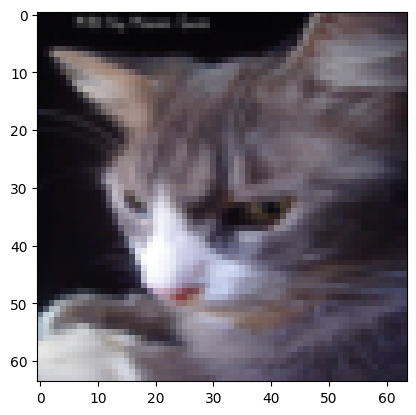

In [51]:
index = 71
plt.imshow(train_set_x_orig[index])

print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
train_set_y.shape


In [52]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_y.shape[1]
num_px=train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [53]:
#we have to flatten the train and test features into an array of size(64*64*3,no of examples)
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [54]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [55]:
#normalization dividing by max value
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [56]:
#Helper functions
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

def ini_with_zeros(dim):
    w=np.zeros((dim,1));
    b=0.0;
    return w, b    

In [57]:
#forward prop and back prop function
def propagate(w, b, X, Y):
    m=m_train
    A=sigmoid(np.dot(w.T,X)+b)
    cost=(-1/m)*np.sum((Y*np.log(A))+((1-Y)*np.log(1-A)))
               
    dw=(1/m)*np.dot(X,((A-Y).T))
    db=(1/m)*np.sum(A-Y)
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [58]:
#calculate parameters
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []  
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        
        
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw;
        b=b-learning_rate*db;
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [59]:
#function to update the parameters using gradient descent

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        
        grads,cost=propagate(w,b,X,Y)
        
        
        dw = grads["dw"]
        db = grads["db"]
        w=w-learning_rate*dw;
        b=b-learning_rate*db;

        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [60]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    
    A=sigmoid(np.dot(w.T,X)+b)
   
    
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1;
        else:
            Y_prediction[0,i]=0;
        
    
    return Y_prediction

In [61]:
#combining all the fns into a model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w = np.zeros((X_train.shape[0], 1))
    b=0
    params,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    w=params["w"]
    b=params["b"]
    Y_prediction_test=predict(w,b,X_test)
    Y_prediction_train=predict(w,b,X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [62]:
#fitting the model on our dataset
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [63]:
test_set_y_pred=logistic_regression_model['Y_prediction_test']

In [64]:
test_set_y_pred

array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0.]])

In [65]:
test_set_y

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)

In [66]:
#testing using image
def preprocess_image(image_path, num_px):
    image = Image.open(image_path).resize((num_px, num_px))
    image = np.array(image) / 255.0
    image = image.reshape(1, -1).T
    return image


def predict_my_image(image_path, model, classes):
    X = preprocess_image(image_path, num_px)
    w = model["w"]
    b = model["b"]

    prob = sigmoid(np.dot(w.T, X) + b)[0,0]
    prediction = int(prob > 0.5)

    label = classes[prediction].decode("utf-8")

    print("Image:", image_path)
    print("Prediction:", label)
    print("Confidence:", prob if prediction == 1 else 1 - prob)

    plt.imshow(Image.open(image_path).resize((num_px, num_px)))
    plt.axis("off")
    plt.show()

Image: testimages/cat.jpg
Prediction: cat
Confidence: 0.5245309900849787


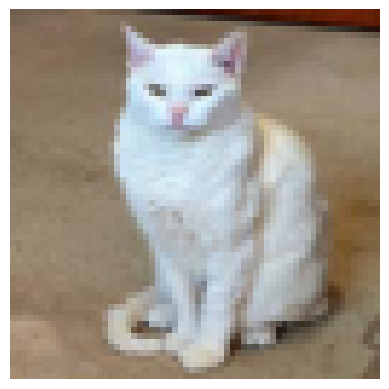

Image: testimages/dog.jpg
Prediction: non-cat
Confidence: 0.9376795959500795


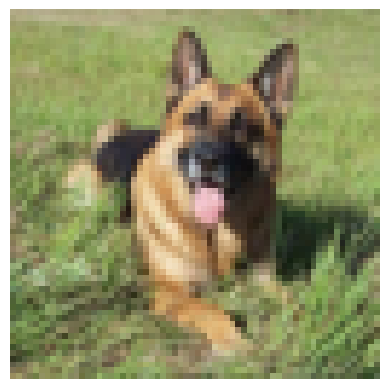

Image: testimages/random.jpg
Prediction: cat
Confidence: 0.8087577216657481


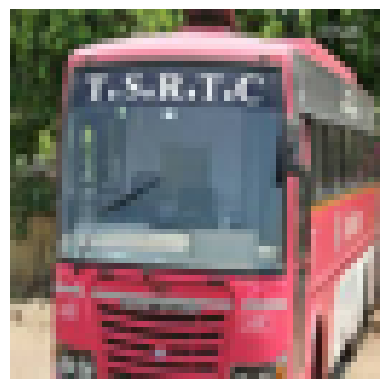

In [67]:
predict_my_image("testimages/cat.jpg", logistic_regression_model, classes)
predict_my_image("testimages/dog.jpg", logistic_regression_model, classes)
predict_my_image("testimages/random.jpg", logistic_regression_model, classes)

In [68]:
#This model is trained on a limited academic dataset and performs poorly on real-world images due to dataset shift and the linear nature of logistic regression. This demonstrates the limitations of linear models on vision tasks.